In [1]:
# Import thenecessary libraies 
import torch 
from sklearn.datasets import load_iris 
from torch.utils.data import TensorDataset, DataLoader 
from sklearn.model_selection import train_test_split 
import torch.nn as nn 
from torchinfo import summary 

# Load the Iris dataset 
iris = load_iris() 

# Convert the data to PyTorch tensors 
X = torch.tensor(iris.data, dtype=torch.float32) 
y = torch.tensor(iris.target, dtype=torch.long) 

# Normalize the input data 
mean = torch.mean(X, dim=0) 
std = torch.std(X, dim=0) 
X = (X - mean) / std 

# Split the dataset into training and validation sets 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) 

# Create PyTorch Datasets 
train_dataset = TensorDataset(X_train, y_train) 
val_dataset = TensorDataset(X_val, y_val) 

# Define the data loaders 
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) 
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


ModuleNotFoundError: No module named 'torch'

In [2]:
pip3 install torch torchvision torchaudio


SyntaxError: invalid syntax (1298787001.py, line 1)

In [3]:
pip install torch torchvision torchaudio

   ---------------------------------------- 0.0/197.8 MB ? eta -:--:--
   ---------------------------------------- 1.4/197.8 MB 43.9 MB/s eta 0:00:05
    --------------------------------------- 4.1/197.8 MB 43.7 MB/s eta 0:00:05
   - -------------------------------------- 6.5/197.8 MB 46.4 MB/s eta 0:00:05
   - -------------------------------------- 8.4/197.8 MB 48.9 MB/s eta 0:00:04
   - -------------------------------------- 9.9/197.8 MB 45.0 MB/s eta 0:00:05
   -- ------------------------------------- 12.7/197.8 MB 46.7 MB/s eta 0:00:04
   --- ------------------------------------ 14.9/197.8 MB 46.7 MB/s eta 0:00:04
   --- ------------------------------------ 15.2/197.8 MB 46.7 MB/s eta 0:00:04
   --- ------------------------------------ 16.0/197.8 MB 36.4 MB/s eta 0:00:05
   --- ------------------------------------ 18.8/197.8 MB 38.5 MB/s eta 0:00:05
   ---- ----------------------------------- 21.2/197.8 MB 40.9 MB/s eta 0:00:05
   ---- ----------------------------------- 24.1/197.8

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\DenilaRajendran\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\networkx\\readwrite\\tests\\test_leda.py'
Consider using the `--user` option or check the permissions.



In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation



In [7]:
url = 'https://media.geeksforgeeks.org/wp-content/uploads/20240320114716/data_for_lr.csv'
data = pd.read_csv(url)
data

# Drop the missing values
data = data.dropna()

# training dataset and labels
train_input = np.array(data.x[0:500]).reshape(500, 1)
train_output = np.array(data.y[0:500]).reshape(500, 1)

# valid dataset and labels
test_input = np.array(data.x[500:700]).reshape(199, 1)
test_output = np.array(data.y[500:700]).reshape(199, 1)


In [8]:
class LinearRegression: 
    def __init__(self): 
        self.parameters = {} 

    def forward_propagation(self, train_input): 
        m = self.parameters['m'] 
        c = self.parameters['c'] 
        predictions = np.multiply(m, train_input) + c 
        return predictions 

    def cost_function(self, predictions, train_output): 
        cost = np.mean((train_output - predictions) ** 2) 
        return cost 

    def backward_propagation(self, train_input, train_output, predictions): 
        derivatives = {} 
        df = (predictions-train_output) 
        # dm= 2/n * mean of (predictions-actual) * input 
        dm = 2 * np.mean(np.multiply(train_input, df)) 
        # dc = 2/n * mean of (predictions-actual) 
        dc = 2 * np.mean(df) 
        derivatives['dm'] = dm 
        derivatives['dc'] = dc 
        return derivatives 

    def update_parameters(self, derivatives, learning_rate): 
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm'] 
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc'] 

    def train(self, train_input, train_output, learning_rate, iters): 
        # Initialize random parameters 
        self.parameters['m'] = np.random.uniform(0, 1) * -1
        self.parameters['c'] = np.random.uniform(0, 1) * -1

        # Initialize loss 
        self.loss = [] 

        # Initialize figure and axis for animation 
        fig, ax = plt.subplots() 
        x_vals = np.linspace(min(train_input), max(train_input), 100) 
        line, = ax.plot(x_vals, self.parameters['m'] * x_vals +
                        self.parameters['c'], color='red', label='Regression Line') 
        ax.scatter(train_input, train_output, marker='o', 
                color='green', label='Training Data') 

        # Set y-axis limits to exclude negative values 
        ax.set_ylim(0, max(train_output) + 1) 

        def update(frame): 
            # Forward propagation 
            predictions = self.forward_propagation(train_input) 

            # Cost function 
            cost = self.cost_function(predictions, train_output) 

            # Back propagation 
            derivatives = self.backward_propagation( 
                train_input, train_output, predictions) 

            # Update parameters 
            self.update_parameters(derivatives, learning_rate) 

            # Update the regression line 
            line.set_ydata(self.parameters['m'] 
                        * x_vals + self.parameters['c']) 

            # Append loss and print 
            self.loss.append(cost) 
            print("Iteration = {}, Loss = {}".format(frame + 1, cost)) 

            return line, 
        # Create animation 
        ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=True) 

        # Save the animation as a video file (e.g., MP4) 
        ani.save('linear_regression_A.gif', writer='ffmpeg') 

        plt.xlabel('Input') 
        plt.ylabel('Output') 
        plt.title('Linear Regression') 
        plt.legend() 
        plt.show() 

        return self.parameters, self.loss 


MovieWriter ffmpeg unavailable; using Pillow instead.


Iteration = 1, Loss = 4601.727704915812
Iteration = 1, Loss = 561.4378048932557
Iteration = 1, Loss = 74.53890269168332
Iteration = 1, Loss = 15.862286088343184
Iteration = 2, Loss = 8.791115098915043
Iteration = 3, Loss = 7.938961910708911
Iteration = 4, Loss = 7.836268047045228
Iteration = 5, Loss = 7.823892188116209
Iteration = 6, Loss = 7.8224006316714
Iteration = 7, Loss = 7.82222075213932
Iteration = 8, Loss = 7.8221989439629365
Iteration = 9, Loss = 7.822196185118319
Iteration = 10, Loss = 7.822195721938662
Iteration = 11, Loss = 7.82219553542478
Iteration = 12, Loss = 7.822195382265303
Iteration = 13, Loss = 7.822195233138559
Iteration = 14, Loss = 7.8221950845109705
Iteration = 15, Loss = 7.822194935956697
Iteration = 16, Loss = 7.822194787424421
Iteration = 17, Loss = 7.822194638907956
Iteration = 18, Loss = 7.822194490406555
Iteration = 19, Loss = 7.822194341920127
Iteration = 20, Loss = 7.822194193448662


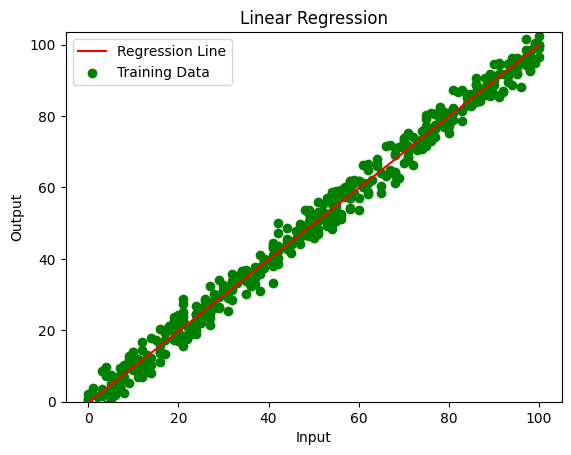

In [9]:
#Example usage
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.0001, 20)


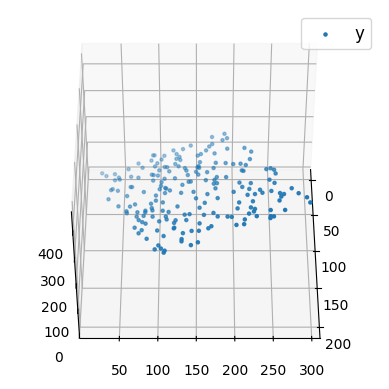

In [10]:
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def generate_dataset(n):
	x = []
	y = []
	random_x1 = np.random.rand()
	random_x2 = np.random.rand()
	for i in range(n):
		x1 = i
		x2 = i/2 + np.random.rand()*n
		x.append([1, x1, x2])
		y.append(random_x1 * x1 + random_x2 * x2 + 1)
	return np.array(x), np.array(y)

x, y = generate_dataset(200)

mpl.rcParams['legend.fontsize'] = 12

fig = plt.figure()
ax = fig.add_subplot(projection ='3d')

ax.scatter(x[:, 1], x[:, 2], y, label ='y', s = 5)
ax.legend()
ax.view_init(45, 0)

plt.show()


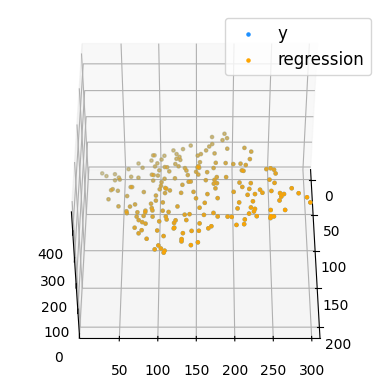

In [11]:
def mse(coef, x, y):
	return np.mean((np.dot(x, coef) - y)**2)/2


def gradients(coef, x, y):
	return np.mean(x.transpose()*(np.dot(x, coef) - y), axis=1)


def multilinear_regression(coef, x, y, lr, b1=0.9, b2=0.999, epsilon=1e-8):
	prev_error = 0
	m_coef = np.zeros(coef.shape)
	v_coef = np.zeros(coef.shape)
	moment_m_coef = np.zeros(coef.shape)
	moment_v_coef = np.zeros(coef.shape)
	t = 0

	while True:
		error = mse(coef, x, y)
		if abs(error - prev_error) <= epsilon:
			break
		prev_error = error
		grad = gradients(coef, x, y)
		t += 1
		m_coef = b1 * m_coef + (1-b1)*grad
		v_coef = b2 * v_coef + (1-b2)*grad**2
		moment_m_coef = m_coef / (1-b1**t)
		moment_v_coef = v_coef / (1-b2**t)

		delta = ((lr / moment_v_coef**0.5 + 1e-8) *
				(b1 * moment_m_coef + (1-b1)*grad/(1-b1**t)))

		coef = np.subtract(coef, delta)
	return coef


coef = np.array([0, 0, 0])
c = multilinear_regression(coef, x, y, 1e-1)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x[:, 1], x[:, 2], y, label='y',
		s=5, color="dodgerblue")

ax.scatter(x[:, 1], x[:, 2], c[0] + c[1]*x[:, 1] + c[2]*x[:, 2],
		label='regression', s=5, color="orange")

ax.view_init(45, 0)
ax.legend()
plt.show()


In [12]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Assume you have independent variables X and a dependent variable y
X = np.array([[1, 2, 3], [2, 3, 4], [3, 4, 5], [4, 5, 6]])
y = np.array([1, 2, 3, 4])

# Create an instance of the LinearRegression class
reg = LinearRegression()

# Fit the model to the data
reg.fit(X, y)

# Print the coefficients of the model
print(reg.coef_)


[0.33333333 0.33333333 0.33333333]
